
# 🗓Section 18 Pt2-19 Statistical Testing

- online-ds-ft-100719
- 11/19/2019

# Topics / Question 
- Resampling to get normal distribution form a non-normal one.
-  Tie concepts together 

## Statistical Testing with Z-scores and p-values

### Population vs Sample
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/sample.png" width=400>


>A **population** is the collection of **all the items of interest in a study**. The numbers you obtain when using a population are called **parameters**.

> A **sample** is a **subset of the population**. The numbers you obtain when working with a sample are called **statistics**.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/rep_sample.png" width=600>

## What Are Hypotheses ?
- Null Hypothesis: $H_0$ there is no relationship / the samples come from the same population.
- Alternative: $H_A$/$H_1$ there is a relationship / the samples DO NOT come from same distribution


$\large \alpha$= 0.05

- What does it mean?
    - cutoff for judging whether our sample is "significantly" different than the population.
    - % chance that you would observe this sample from your population dataset







| Set     | $H_0   $    | $H_a$ | Tails |
|---------|-------|-------|-------|
|<img width=30/>|<img width=100/>|<img width=100/>|<img width=50/>|
| 1  | $\mu= M $ |$\mu \neq M $ | 2  | 
| 2  | $\mu \geq M $ |$\mu < M $ | 1  | 
| 3  | $\mu \leq M $ |$\mu > M $ | 1  | 


### One-Sample $z$-test

> **The one-sample $z$-test is used only for tests related to the sample mean.** 



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400>


For $z$-tests, a $z$-statistic is used as our test statistic. You'll see other test statistics suitable for other tests later. A one-sample $z$-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". 


# Titanic
- Compare survivors vs non-survivors ages

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.4.34 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
dft = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
# convert column names to lowercase
dft.columns = [col.lower() for col in dft.columns ]
dft['sex_code'] = (dft['sex']=='female').astype('int')
dft.drop('cabin', axis=1,inplace=True)
dft.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


14.75


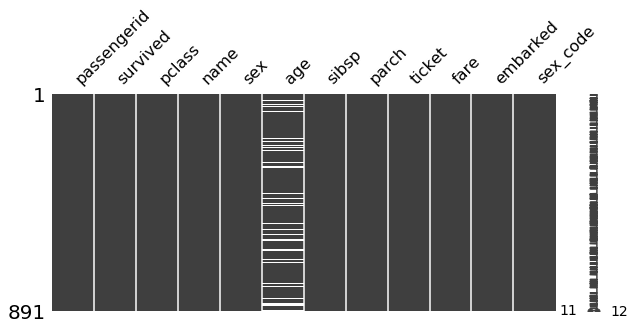

In [3]:
import missingno as ms
mat_size = 10,4
ms.matrix(dft,figsize=mat_size)
print(dft['age'].isna().sum()/dft.shape[1])

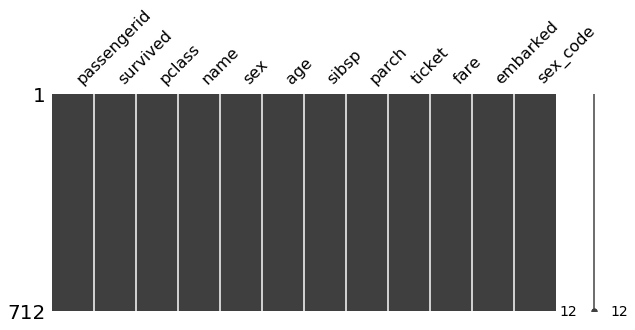

In [4]:
dft.dropna(inplace=True)
ms.matrix(dft,figsize=mat_size)

In [5]:
## Get the category names and group member idx as a dict
survived = dft.groupby('survived').groups
survived

{0: Int64Index([  0,   4,   6,   7,  12,  13,  14,  16,  18,  20,
             ...
             873, 876, 877, 881, 882, 883, 884, 885, 886, 890],
            dtype='int64', length=424),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  21,  22,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=288)}

In [18]:
print(type(survived))
print(survived.keys())
print(survived)

<class 'dict'>
dict_keys([0, 1])


In [6]:
# We can use survived dict to reference df rows
display(dft.loc[survived[1]].head(2))
display(dft.loc[survived[0]].head(2))

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,sex_code
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,0


In [0]:
# Replace the indices with the actual dataframes
for grp,idx in survived.items():
    survived[grp] = dft.loc[idx]

In [0]:
from scipy import stats

def print_normtest(x,label=None,as_series=False):
    if label is None:
        try:
            label=x.name
        except:
            label=''

    results = ['Survived','Norm Stat','p value','(p<0.05)']

    out = stats.normaltest(x)

    values = [label, out.statistic.round(3),
              out.pvalue.round(4), out.pvalue<0.05]

    results=dict(zip(results,values))

    print(f"\n--- stats.normtest results:")
    [print(f"{k:{15}} : {v}")for k,v in results.items()]
    
    if as_series:
        return pd.Series(results)

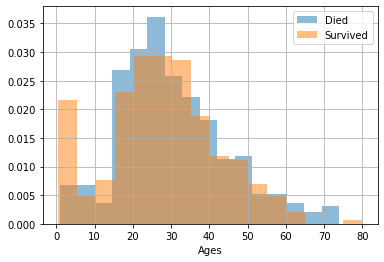


--- stats.normtest results:
Survived        : Died
Norm Stat       : 23.069
p value         : 0.0
(p<0.05)        : True

--- stats.normtest results:
Survived        : Survived
Norm Stat       : 1.491
p value         : 0.4745
(p<0.05)        : False


In [27]:
# Lets visualize the distributions of age by survived
survived[0]['age'].hist(bins='auto',label='Died',density=True,alpha=0.5)
survived[1]['age'].hist(bins='auto',label='Survived',density=True,alpha=0.5)
ax = plt.gca()
ax.legend()
ax.set_xlabel('Ages')
plt.show()
print_normtest(survived[0]['age'],label='Died')
print_normtest(survived[1]['age'],label='Survived')

In [0]:

# def get_normtest_results(survived,col='age'):
#     from scipy import stats
#     results = [['Survived','Norm Stat','p value','(p<0.05)']]
#     for k,v in survived.items():
#         out = stats.normaltest(survived[k][col])
#         results.append([k,out.statistic,out.pvalue,out.pvalue<0.05])
#     return fs.ds.list2df(results)

# # def calculate_normtest():
# #     from scipy import stats
# #     results = [['Survived','Norm Stat','p value','(p<0.05)']]
# #     for k,v in survived.items():
# #         out = stats.normaltest(v)#survived[k][col])
# #         results.append([k,out.statistic,out.pvalue,out.pvalue<0.05])
# #     return fs.ds.list2df(results)

# get_normtest_results(survived)

## Demonstrating How Taking Many Samples Creates a Normal Distribution of Means


--- stats.normtest results:
Survived        : Died
Norm Stat       : 23.069
p value         : 0.0
(p<0.05)        : True

--- stats.normtest results:
Survived        : Survived
Norm Stat       : 1.491
p value         : 0.4745
(p<0.05)        : False


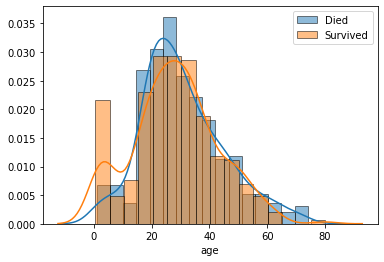

In [29]:
hist_kws = {'alpha':0.5,'edgecolor':'black'}
sns.distplot(survived[0]['age'],label='Died',hist_kws=hist_kws)#,'color':'red'})
sns.distplot(survived[1]['age'],label='Survived',hist_kws=hist_kws)#,'color':'blue'})
plt.legend()
print_normtest(survived[0]['age'],label='Died')
print_normtest(survived[1]['age'],label='Survived')


In [14]:
df_0 = survived[0]['age']
df_1 = survived[1]['age']
print(len(df_0),len(df_1))

424 288


In [0]:
ser = dft['survived']
ser.sample

In [0]:
def get_sampled_means(data,n_samples,samp_size=50):

    means = []
    for n in range(n_samples):
        sample = data.sample(samp_size)
        means.append(sample.mean())
    return means




 ------------------------------------------------------------------------------------------
10 samples:

--- stats.normtest results:
Survived        : Died: 10 samples
Norm Stat       : 0.882
p value         : 0.6435
(p<0.05)        : False

--- stats.normtest results:
Survived        : Died: 10 samples
Norm Stat       : 1.682
p value         : 0.4312
(p<0.05)        : False


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


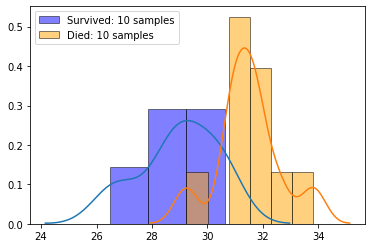


 ------------------------------------------------------------------------------------------
50 samples:

--- stats.normtest results:
Survived        : Died: 50 samples
Norm Stat       : 3.762
p value         : 0.1525
(p<0.05)        : False

--- stats.normtest results:
Survived        : Died: 50 samples
Norm Stat       : 10.186
p value         : 0.0061
(p<0.05)        : True


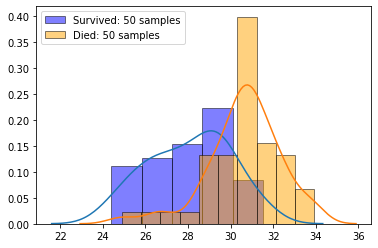


 ------------------------------------------------------------------------------------------
100 samples:

--- stats.normtest results:
Survived        : Died: 100 samples
Norm Stat       : 3.378
p value         : 0.1847
(p<0.05)        : False

--- stats.normtest results:
Survived        : Died: 100 samples
Norm Stat       : 1.742
p value         : 0.4185
(p<0.05)        : False


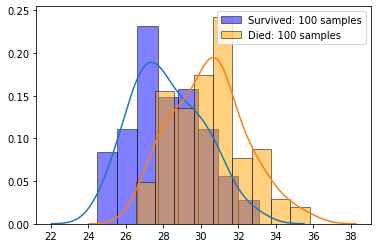


 ------------------------------------------------------------------------------------------
1000 samples:

--- stats.normtest results:
Survived        : Died: 1000 samples
Norm Stat       : 1.991
p value         : 0.3695
(p<0.05)        : False

--- stats.normtest results:
Survived        : Died: 1000 samples
Norm Stat       : 5.554
p value         : 0.0622
(p<0.05)        : False


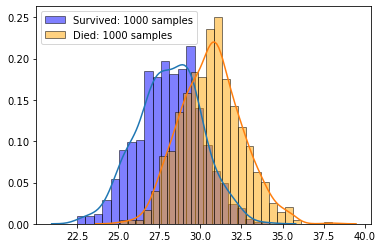


 ------------------------------------------------------------------------------------------
10000 samples:

--- stats.normtest results:
Survived        : Died: 10000 samples
Norm Stat       : 1.36
p value         : 0.5065
(p<0.05)        : False

--- stats.normtest results:
Survived        : Died: 10000 samples
Norm Stat       : 2.947
p value         : 0.2292
(p<0.05)        : False


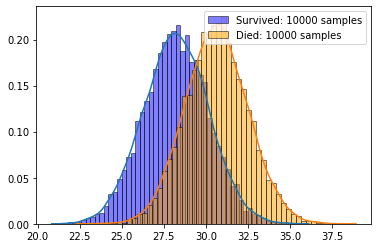

------------------------------------------------------------------------------------------
ORIGINAL DATA:



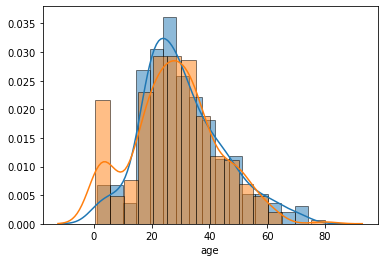

In [51]:
## Use a for loop, get_sampled_means, and print_normtest 
resampling_to_test=[10,50,100,1000,10000]
df_survived = dft.groupby('survived').get_group(1) 
df_died =  dft.groupby('survived').get_group(0) 

for n_samples in resampling_to_test:
    print('\n','---'*30)
    print(f"{n_samples} samples:")
    fig,ax=plt.subplots()
    hist_kws_survived = {'alpha':0.5,'edgecolor':'black','color':'blue'}
    hist_kws_died = {'alpha':0.5,'edgecolor':'black','color':'orange'}

    means_survived = get_sampled_means(df_survived['age'],
                                       n_samples=n_samples,
                                       samp_size=50)
    print_normtest(means_survived,label=f"Died: {n_samples} samples")
    sns.distplot(means_survived,ax=ax,
                 label=f"Survived: {n_samples} samples",
                 hist_kws=hist_kws_survived)
    # ax[0].legend()
    
    means_died = get_sampled_means(df_died['age'],
                                    n_samples=n_samples,
                                    samp_size=50)
    print_normtest(means_died,label=f"Died: {n_samples} samples")
    sns.distplot(means_died,ax=ax,
                 label=f"Died: {n_samples} samples",
                 hist_kws=hist_kws_died)
    ax.legend()
    plt.show()


print('---'*30)
print('ORIGINAL DATA:\n')
sns.distplot(survived[0]['age'],label='Died',hist_kws=hist_kws)#,'color':'red'})
sns.distplot(survived[1]['age'],label='Survived',hist_kws=hist_kws)#,'color':'blue'})

In [0]:
# import plotly.express as px

# fig = px.scatter_matrix(dft,
#                   dimensions=['survived','sex','age','ticket','fare'],
#                   color='survived',symbol='sex',height=800,title='',
#                   template='ggplot2'
#                   )
# plt.tight_layout()
# fig